In [157]:
# -*- coding: utf8
from IPython.display import HTML
from scipy import stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [158]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [159]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [73]:
movies = pd.read_csv('datasets/IMDb_movies.csv')
movies.head()

/home/joao/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [50]:
names = pd.read_csv('datasets/IMDb_names.csv')
names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [74]:
ratings = pd.read_csv('datasets/IMDb_ratings.csv')
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [52]:
title_principals = pd.read_csv('datasets/IMDb_title_principals.csv')
title_principals.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


## Regressões Lineares

In [53]:
def covariance(x, y):
    n = len(x)
    x_m = x - np.mean(x)
    y_m = y - np.mean(y)
    return (x_m * y_m).sum() / (n - 1)

In [54]:
def corr(x, y):
    n = len(x)
    x_m = x - np.mean(x)
    x_m = x_m / np.std(x, ddof=1)
    y_m = y - np.mean(y)
    y_m = y_m / np.std(y, ddof=1)
    return (x_m * y_m).sum() / (n - 1)

In [55]:
def rank(x):
    aux = x.argsort()
    return aux.argsort()

In [56]:
def least_squares_fit(x, y):
    correlationxy = stats.pearsonr(x, y)[0]
    beta = correlationxy * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

In [57]:
def error(alpha, beta, x, y):
    model = beta * x + alpha
    return y - model

In [58]:
def sum_of_squared_errors(alpha, beta, x, y):
    return (error(alpha, beta, x, y) ** 2).sum()

In [59]:
def total_sum_of_squares(y):
    return ((y - y.mean()) ** 2).sum()

def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))


### Teste 1

In [60]:
print(ratings.columns)
print()
print(movies.columns)

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

Primeiro vamos selecionar algumas colunas com valores numéricos de interesse

In [142]:
df = pd.merge(ratings[['imdb_title_id', 'total_votes', 'mean_vote', 'males_allages_votes', 'females_allages_votes', 'us_voters_votes']], movies[['imdb_title_id', 'year', 'duration', 'budget']], on='imdb_title_id').dropna()
df = df.rename(columns={'males_allages_votes': 'mav', 'females_allages_votes': 'fav', 'us_voters_votes' : 'us'})
df = df.drop(['imdb_title_id'], axis=1)

# Selecionando orçamentos em dollar e convertendo para inteiro
df['budget'] = df['budget'].convert_dtypes()
df = df[df['budget'].str.contains("\$")]
df['budget'] = df['budget'].str.extract('(\d+)').astype(int)

# Selecionando filmes publicados após 1913
df['year'] = df['year'].astype(int)
df = df[df['year'] >= 1913]
df = df.reset_index(drop=True)

df

,total_votes,mean_vote,mav,fav,us,year,duration,budget
0,552,6.0,399.0,54.0,251.0,1913,88,5700
1,3073,6.5,2149.0,402.0,1035.0,1914,148,210000
2,415,5.2,300.0,48.0,195.0,1914,59,23500
3,1239,7.2,793.0,272.0,590.0,1914,61,40000
4,939,7.5,568.0,282.0,584.0,1914,199,25000
...,...,...,...,...,...,...,...,...
16584,1206,6.8,727.0,146.0,89.0,2019,122,1200000
16585,2357,5.0,1542.0,164.0,281.0,2019,92,3000000
16586,249,8.9,21.0,8.0,15.0,2019,92,7000
16587,174,2.7,119.0,20.0,31.0,2019,77,500000


Iremos utilizar um dataset extraido de https://fred.stlouisfed.org/series/CPIAUCNS.
Ele servirá para fazer a correção monetária dos orçamentos em relação à inflação.

In [143]:
cpi = pd.read_csv('datasets/CPIAUCNS.csv')
cpi['DATE'] =  pd.to_datetime(cpi['DATE'])
current_cpi = cpi.iloc[-1, 1]
cpi['CURRENT'] = current_cpi
cpi['CPIAUCNS'] = cpi['CURRENT'] / cpi['CPIAUCNS']
cpi

,DATE,CPIAUCNS,CURRENT
0,1913-01-01,26.692041,261.582
1,1913-02-01,26.692041,261.582
2,1913-03-01,26.692041,261.582
3,1913-04-01,26.692041,261.582
4,1913-05-01,26.967216,261.582
...,...,...,...
1292,2020-09-01,1.005002,261.582
1293,2020-10-01,1.004585,261.582
1294,2020-11-01,1.005199,261.582
1295,2020-12-01,1.004254,261.582


In [144]:
# Ajustando datas e unindo datasets
df['day'] = 1
df['month'] = 1
new_df = df[['year', 'month', 'day']]
df['DATE'] = pd.to_datetime(new_df)
df = pd.merge(df, cpi, on='DATE')

# Corrigindo a inflação
df['budget'] = df['budget'] * df['CPIAUCNS']

# Removendo colunas que não são de interesse
df = df.drop(['year', 'day', 'month', 'DATE', 'CPIAUCNS', 'CURRENT'], axis=1)

df

,total_votes,mean_vote,mav,fav,us,duration,budget
0,552,6.0,399.0,54.0,251.0,88,1.521446e+05
1,3073,6.5,2149.0,402.0,1035.0,148,5.493222e+06
2,415,5.2,300.0,48.0,195.0,59,6.147177e+05
3,1239,7.2,793.0,272.0,590.0,61,1.046328e+06
4,939,7.5,568.0,282.0,584.0,199,6.539550e+05
...,...,...,...,...,...,...,...
16584,19858,6.8,7835.0,5705.0,2954.0,124,1.013998e+07
16585,720,5.3,475.0,52.0,140.0,89,4.816489e+05
16586,724,7.9,186.0,16.0,43.0,140,5.069988e+06
16587,185,4.1,79.0,21.0,15.0,85,3.041993e+04


In [145]:
df.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,total_votes,mean_vote,mav,fav,us,duration,budget
count,16589,16589,16589,16589,16589,16589,16589
mean,40316,6,25563,5829,7063,101,22659157
std,114695,1,71909,16390,17909,20,37793557
min,100,1,6,1,1,42,0
25%,491,6,307,64,136,89,1425366
50%,2770,6,1791,345,723,97,7768492
75%,25927,7,16371,3469,5556,110,26890211
max,2278845,10,1409165,278964,348363,580,445516788


Plotamos todas as correlações para ajudar na visualização dos dados

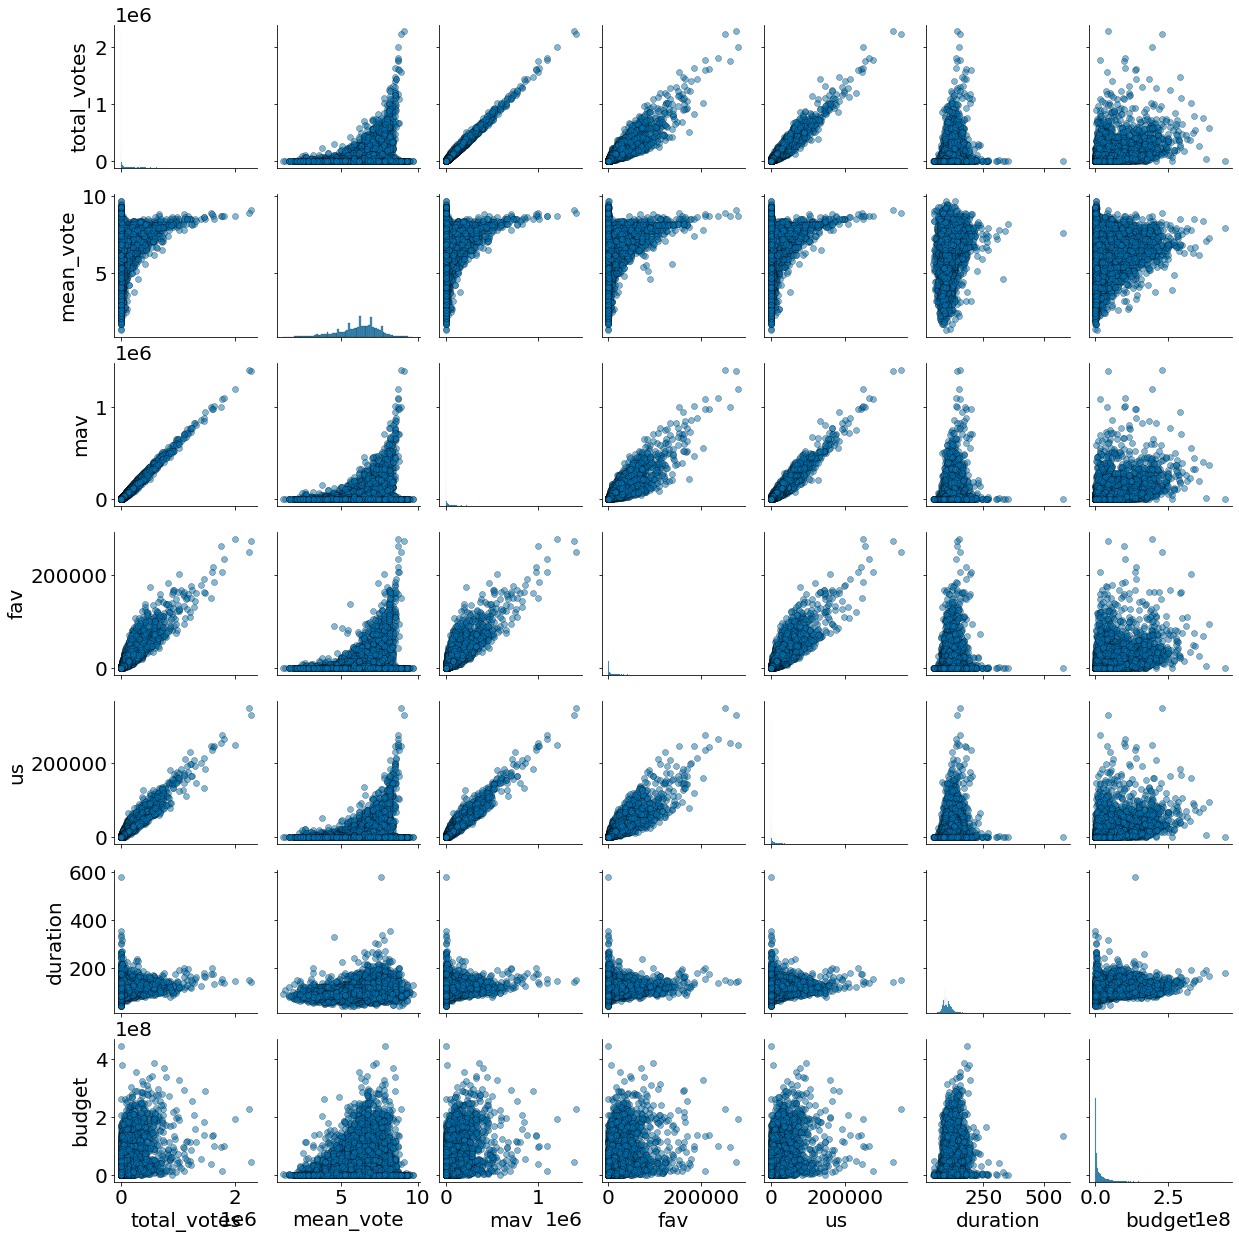

In [146]:
sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

Faremos uma regressão linear simples entre o orçamento e a popularidade do filme. Primeiro utilizando apenas a correlação de Pearson e depois com correlação de Spearman

In [147]:
x_p = np.array(df['budget'])
y_p = np.array(df['total_votes'])

In [148]:
print(covariance(x, y))
corr(x_p, y_p)

16305556.056355856


0.5188212593318636

In [149]:
x_s = rank(x)
y_s = rank(y)
corr(x_s, y_s)

0.7107112787953938

A Correlação de Spearman é mais alta que a de Pearson

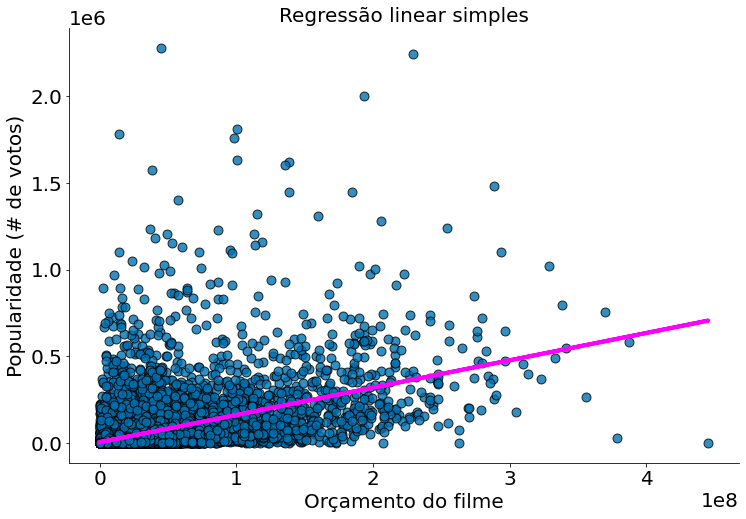

In [156]:
alpha_p, beta_p = least_squares_fit(x_p, y_p)
y_model = beta_p * x_p + alpha_p
plt.scatter(x_p, y_p, alpha=0.8, edgecolors='k', s=80)
plt.plot(x_p, y_model, color='magenta')
plt.xlabel('Orçamento do filme')
plt.ylabel('Popularidade (# de votos)')
plt.title('Regressão linear simples')
despine()

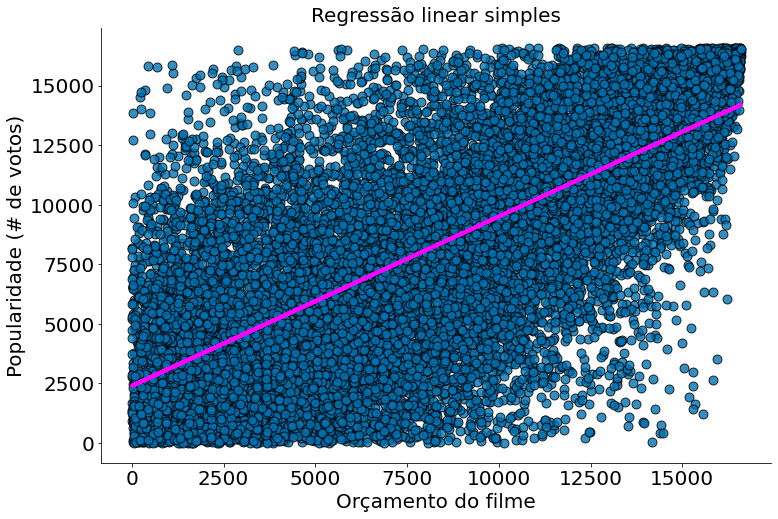

In [160]:
alpha_s, beta_s = least_squares_fit(x_s, y_s)
y_model = beta_s * x_s + alpha_s
plt.scatter(x_s, y_s, alpha=0.8, edgecolors='k', s=80)
plt.plot(x_s, y_model, color='magenta')
plt.xlabel('Orçamento do filme')
plt.ylabel('Popularidade (# de votos)')
plt.title('Regressão linear simples')
despine()

In [161]:
print(alpha_p, beta_p)
print(alpha_s, beta_s)

4638.53059399331 0.001574506214337937
2399.7945867528115 0.7107112787953938


Podemos observar uma relação positiva em ambos os gráficos. Para determinar o quão bem os dados foram ajustados iremos utilizar o coeficiente de determinação.

In [162]:
print(r_squared(alpha_p, beta_p, x_p, y_p))
print(r_squared(alpha_s, beta_s, x_s, y_s))

0.2691754991347006
0.5051105218069838


O $R^2$ foi de 0.26 para Pearson e 0.50 para Spearman, não são valores muito altos, portanto, devem existir outras variáveis que afetam a popularidade de um filme.